In [6]:
import pandas as pd
import numpy as np
# from datetime import timedelta
import matplotlib.pyplot as plt
import datetime as dt
import os

# Compiling All Listening Data
This section brings all the 10MB json files together into 1 data frame. Spotify provides a lot of information when you make a full data request, but the streaming information is located in files that start with 'endsong'. Each of these files is about 10MB.

In [7]:
path = 'MyData/' #whatever your unzipped folder is named that contains all SpotifyData

song_files = [pos_json for pos_json in os.listdir(path) if pos_json.startswith('endsong')]
print(song_files)

df = pd.read_json(path+song_files[0])
for file in song_files[1:]:
    df_temp = pd.read_json(path+file)
    df = df.append(df_temp)
df = df.sort_values(by='ts')
df = df.reset_index(drop=True)
df['ts'] = pd.to_datetime(df['ts'])
df

['endsong_3.json', 'endsong_2.json', 'endsong_5.json', 'endsong_8.json', 'endsong_4.json', 'endsong_7.json', 'endsong_6.json', 'endsong_1.json', 'endsong_0.json']


,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2012-08-29 23:40:25+00:00,1245898731,OS X 10.7.4 [x86 4],12509,US,99.67.237.197,unknown,Daylight,Matt and Kim,Grand,...,None,None,None,remote,,False,1.0,False,0,0.0
1,2012-08-29 23:42:29+00:00,1245898731,OS X 10.7.4 [x86 4],23492,US,99.67.237.197,unknown,Daylight,Matt and Kim,Grand,...,None,None,None,,popup,False,1.0,False,0,0.0
2,2012-08-29 23:44:55+00:00,1245898731,OS X 10.7.4 [x86 4],107902,US,99.67.237.197,unknown,Make It Bun Dem,Skrillex,Make It Bun Dem,...,None,None,None,popup,popup,False,1.0,False,0,0.0
3,2012-08-29 23:46:16+00:00,1245898731,OS X 10.7.4 [x86 4],81785,US,99.67.237.197,unknown,Too Close,Alex Clare,The Lateness Of The Hour,...,None,None,None,popup,uriopen,False,1.0,False,0,0.0
4,2012-08-29 23:47:21+00:00,1245898731,OS X 10.7.4 [x86 4],65687,US,99.67.237.197,unknown,Some Nights,fun.,Some Nights,...,None,None,None,uriopen,uriopen,False,1.0,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143060,2021-12-27 23:22:01+00:00,1245898731,"iOS 15.1 (iPhone12,1)",29442,US,66.196.7.246,unknown,Back On The Boulevard - Original Mix,Purple Velvet,Sparks Fly EP,...,None,None,None,trackdone,endplay,True,NaN,False,1640647290405,0.0
143061,2021-12-27 23:22:03+00:00,1245898731,"iOS 15.1 (iPhone12,1)",1462,US,66.196.7.246,unknown,Havana Burning,Dan Reeder,Dan Reeder,...,None,None,None,playbtn,fwdbtn,True,NaN,False,1640647321033,0.0
143062,2021-12-27 23:26:30+00:00,1245898731,"iOS 15.1 (iPhone12,1)",268857,US,66.196.7.246,unknown,Summer,Skinshape,Oracolo,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1640647322529,0.0
143063,2021-12-27 23:28:29+00:00,1245898731,"iOS 15.1 (iPhone12,1)",124693,US,66.196.7.246,unknown,Norwegian Wood (This Bird Has Flown) - Remaste...,The Beatles,Rubber Soul,...,None,None,None,trackdone,trackdone,True,NaN,False,1640647584208,0.0


In [8]:
df.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
df['conn_country'].value_counts()

US    139756
ZZ      2257
MX       339
CA       271
KY       150
DE       104
NZ        82
CN        58
AU        25
FI        16
DJ         5
GM         2
Name: conn_country, dtype: int64

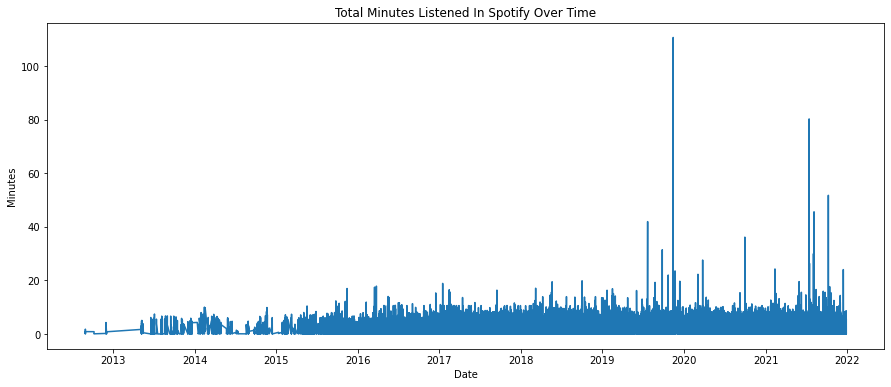

In [10]:
plt.plot(df['ts'],df['ms_played']/(1000*60))
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.title('Total Minutes Listened In Spotify Over Time')
fig = plt.gcf()
fig.set_size_inches(15,6)

In [11]:
reason_starts = df['reason_start'].value_counts()
reason_ends = df['reason_end'].value_counts()
df_reasons = reason_starts.to_frame().join(reason_ends)
df_reasons

,reason_start,reason_end
trackdone,74942,75742.0
fwdbtn,36626,36643.0
clickrow,20656,1840.0
unknown,2316,2539.0
backbtn,2302,2283.0
playbtn,2120,NaN
remote,1609,1920.0
appload,1279,NaN
popup,825,799.0
trackerror,237,87.0


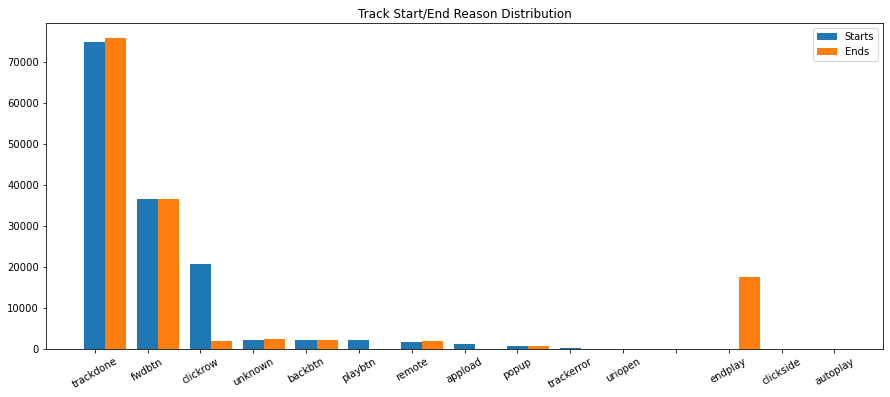

In [12]:
index = np.arange(len(df_reasons))
bar_width = 0.4

fig, ax = plt.subplots()
starts = ax.bar(index, 
                df_reasons['reason_start'],
                bar_width,
                label="Starts")

ends = ax.bar(index+bar_width,
              df_reasons['reason_end'],
              bar_width, 
              label="Ends")

plt.xticks(index, df_reasons.index, rotation=30)
plt.title('Track Start/End Reason Distribution')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)

In [13]:
df['offline'].value_counts()

False    139911
True       3154
Name: offline, dtype: int64